In [232]:

%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

In [233]:
!pip install eli5
!pip install -U scikit-learn
from pandas_profiling import ProfileReport
from category_encoders import OneHotEncoder
from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder

from sklearn.pipeline import Pipeline #make_pipeline과의 차이를 알아둘 것
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import OrdinalEncoder #float type을 제외한 다른 타입 전부 변환 *사용주의*
from sklearn.feature_selection import f_regression, SelectKBest
from scipy.stats import randint, uniform
from sklearn.metrics import classification_report

import eli5
from eli5.sklearn import PermutationImportance

In [234]:
from scipy import stats
import matplotlib as mpl
import matplotlib.font_manager
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [235]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [236]:

train_url = '/content/train.csv'


# train 데이터셋을 불러옵니다
df = pd.read_csv(train_url)

In [237]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7064 entries, 0 to 7063
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rcDate      7064 non-null   int64  
 1   rcNo        7064 non-null   int64  
 2   chulNo      7064 non-null   int64  
 3   hrNo        7064 non-null   int64  
 4   age         7064 non-null   int64  
 5   ageCond     7064 non-null   object 
 6   budam       7064 non-null   object 
 7   chaksunT    7064 non-null   int64  
 8   chaksunY    7064 non-null   int64  
 9   chaksun_6m  7064 non-null   int64  
 10  dusu        7064 non-null   int64  
 11  ilsu        7064 non-null   int64  
 12  ord1CntT    7064 non-null   int64  
 13  ord1CntY    7064 non-null   int64  
 14  ord2CntT    7064 non-null   int64  
 15  ord2CntY    7064 non-null   int64  
 16  ord3CntT    7064 non-null   int64  
 17  ord3CntY    7064 non-null   int64  
 18  prd         7064 non-null   object 
 19  prizeCond   7064 non-null  

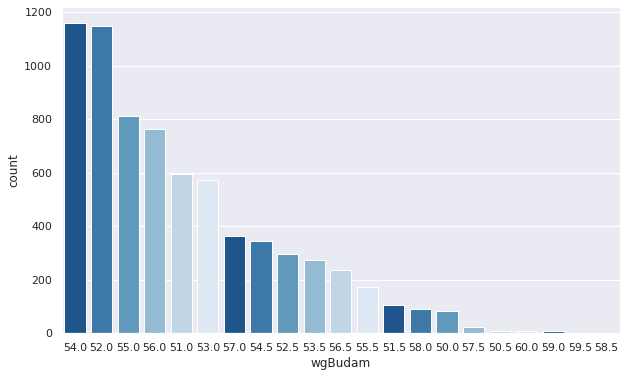

In [238]:
sns.set(style='darkgrid')
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='wgBudam', palette=sns.color_palette("Blues_r"),
              order = df['wgBudam'].value_counts().index)

In [239]:
for i in df.columns:
    print(i, df[i].isnull().sum().sum())
    #결측지 확인

rcDate 0
rcNo 0
chulNo 0
hrNo 0
age 0
ageCond 0
budam 0
chaksunT 0
chaksunY 0
chaksun_6m 0
dusu 0
ilsu 0
ord1CntT 0
ord1CntY 0
ord2CntT 0
ord2CntY 0
ord3CntT 0
ord3CntY 0
prd 0
prizeCond 0
rank 0
rating 0
rcCntT 0
rcCntY 0
rcDist 0
sex 0
wgBudam 0
track 0
weather 0
waterRate 0
ord 0
rcTime 0
jkNo 0
trNo 0
owNo 0


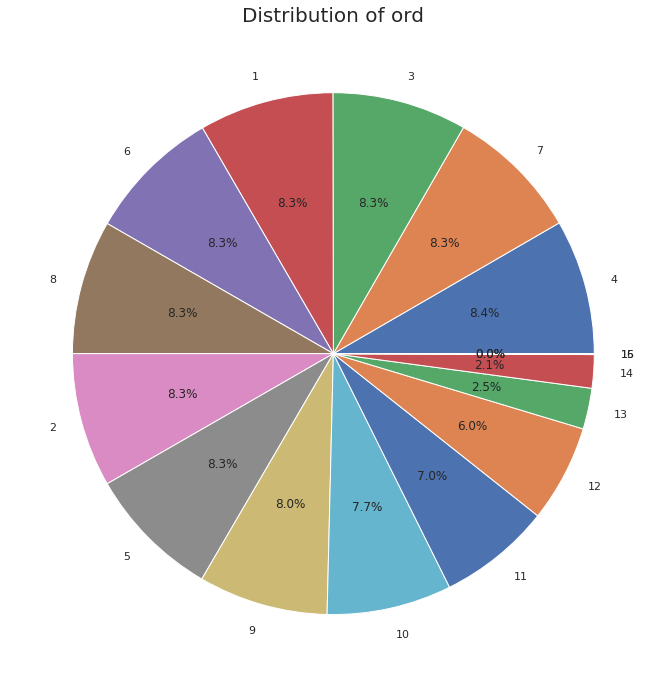

In [240]:
bar, ax = plt.subplots(figsize = (12,12))
plt.pie(df['ord'].value_counts(), labels = df['ord'].value_counts().index, autopct="%.1f%%")
plt.title('Distribution of ord', size=20);
#타겟 분포도 확인 / 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46321 missing from current font.
  w /= 64.0  # convert from subpixels
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  w /= 64.0  # convert from subpixels
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  w /= 64.0  # convert from subpixels
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54844 missing from current font.
  w /= 64.0  # convert from subpixels
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46321 missing from current font.
  # The descent needs to be adjusted for the angle.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44553 missing from curren

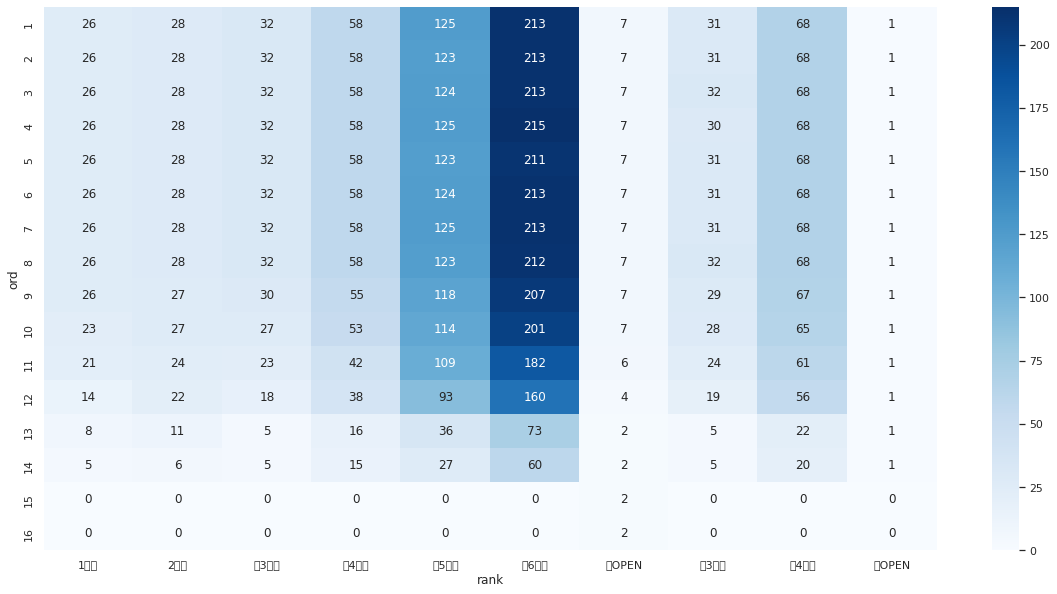

In [241]:
df_p = df.pivot_table(index="ord", columns="rank", aggfunc='size')
df_p=df_p.fillna(0)
plt.figure(figsize = (20,10))
sns.heatmap(df_p, cmap = 'Blues', annot = True, fmt = '.0f');
#마 등급과 등수와의 상관관계 히트맵으로 확인

In [242]:
df['chulNo'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [243]:
col1 = df.columns[30:31].to_list()
col2 = df.columns[:30].to_list()
col3 = df.columns[31:].to_list()
new_col = col1 + col2 + col3
df = df[new_col]

In [244]:
#1 등 2 등 말들을 1 로, 나머지 하위 등수 말들을 0으로 맵핑해주었다. 이와 같이 Target 값을 설정한 이유는 복수승 말인 1 등과 2 등(순서와는 상관없이)말들을 예측하기 위함.
for i in range(len(df)):
  if df.iloc[i, 0] < 3:
    df.iloc[i, 0] = 1
  else:
    df.iloc[i,0] = 0

In [245]:
df['ord'].unique()

array([0, 1])

In [246]:
df.nunique()

ord              2
rcDate          85
rcNo            15
chulNo          16
hrNo          1397
age             10
ageCond          5
budam            3
chaksunT      2445
chaksunY      2100
chaksun_6m    1515
dusu             9
ilsu            85
ord1CntT        13
ord1CntY         8
ord2CntT        11
ord2CntY         7
ord3CntT        12
ord3CntY         7
prd              5
prizeCond        7
rank            10
rating         113
rcCntT          93
rcCntY          19
rcDist           7
sex              3
wgBudam         21
track            5
weather          3
waterRate       16
rcTime         594
jkNo            57
trNo            52
owNo           291
dtype: int64

In [247]:
df['rcCntT'].value_counts()

0      465
1      451
2      439
3      436
4      392
      ... 
115      1
109      1
118      1
117      1
86       1
Name: rcCntT, Length: 93, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


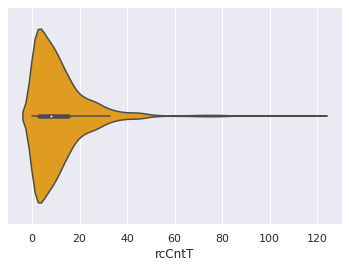

In [248]:
sns.violinplot(df.rcCntT,color='orange');

In [249]:
df = df.loc[df['rcCntT'] < 60] # 이상치 제거

In [250]:
len(df['rcCntT'].unique())

59

In [251]:
df['rating'].value_counts() # 일반적으로 1 ~ 140

-      2489
36      280
31      224
30      190
38      189
       ... 
132       1
130       1
96        1
106       1
136       1
Name: rating, Length: 113, dtype: int64

In [252]:
df['rating'] = df['rating'].replace('-',0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [253]:
df['rating'].value_counts() # 문자열 '-' 을 0으로 변경

0      2489
36      280
31      224
30      190
38      189
       ... 
132       1
130       1
96        1
106       1
136       1
Name: rating, Length: 113, dtype: int64

In [254]:
df['rating'] = df['rating'].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


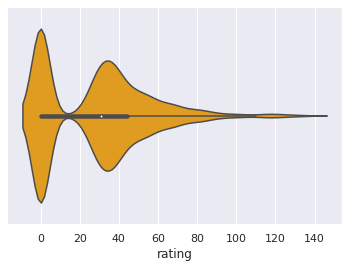

In [255]:
sns.violinplot(df.rating,color='orange');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


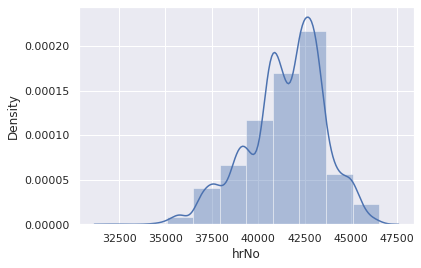

In [256]:
sns.distplot(df['hrNo'], bins=10)
plt.show()

In [257]:
#유의미한 특성들만을 가지고 데이터프레임 구성
df = df.drop(['rcDate', 'chaksunT', 'chaksunY', 'chaksun_6m', 'ilsu', 'rcTime'], axis='columns') # 경기 날짜, 상금, 경기기록, 경마 일수 칼럼 제거

In [258]:
df.nunique()

ord             2
rcNo           15
chulNo         16
hrNo         1390
age             8
ageCond         5
budam           3
dusu            9
ord1CntT       13
ord1CntY        8
ord2CntT       11
ord2CntY        7
ord3CntT       11
ord3CntY        7
prd             5
prizeCond       7
rank           10
rating        112
rcCntT         59
rcCntY         17
rcDist          7
sex             3
wgBudam        21
track           5
weather         3
waterRate      16
jkNo           57
trNo           52
owNo          290
dtype: int64

In [259]:
from sklearn.metrics import recall_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix


In [260]:
rf1_result = []
rf1_recall1 = []
rf1_recall0 = []
rf1_c_m = []
rf1_yscore = []
for i in range(30):
  print("iter",i)
  tr_data, te_data = train_test_split(df, test_size = 0.2)

  tr_X = tr_data.iloc[:,1:]
  tr_Y = tr_data.iloc[:,0]
  te_X = te_data.iloc[:,1:]
  te_Y = te_data.iloc[:,0]

  encoder = TargetEncoder()
  tr_X = encoder.fit_transform(tr_X, tr_Y)
  te_X = encoder.transform(te_X) 

  print('training')
  rf = RandomForestClassifier(class_weight='balanced', n_estimators=500, max_depth = 25, max_features = 'auto', bootstrap = False)# 가중치를 주어 과적합을 해결
  cl = rf.fit(tr_X.values, tr_Y.values)

  print("test")
  pred = cl.predict(te_X)
  yscore = cl.predict_proba(te_X)


  acc = np.sum(te_Y.values == pred) / len(pred)
  re1 = metrics.recall_score(te_Y.values, pred,pos_label=1)
  re0 = metrics.recall_score(te_Y.values, pred,pos_label = 0)
  cm = confusion_matrix(te_Y,pred,labels = [0,1])
  rf1_yscore.append(yscore)


  rf1_result.append(acc)
  rf1_recall1.append(re1)
  rf1_recall0.append(re0)
  rf1_c_m.append(cm)

print(np.mean(rf1_result))
print(np.mean(rf1_recall1))
print(np.mean(rf1_recall0))

iter 0
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 1
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 2
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 3
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 4
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 5
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 6
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 7
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 8
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 9
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 10
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 11
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 12
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 13
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 14
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 15
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 16
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 17
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 18
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 19
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 20
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 21
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 22
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 23
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 24
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 25
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 26
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 27
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 28
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


iter 29
training
test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.8303571428571429
0.12134464339992494
0.9714690124052269


In [261]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [262]:
#validation 및 train 데이터를 종합하여 최종모델을 재학습

df_X = df.iloc[:,1:]
df_Y = df.iloc[:,0]

encoder = TargetEncoder()
df_X = encoder.fit_transform(df_X, df_Y)


rf = RandomForestClassifier(class_weight='balanced', n_estimators=500, max_depth = 25, max_features = 'auto', bootstrap = False)# 가중치를 주어 과적합을 해결
cl = rf.fit(df_X.values, df_Y.values)



In [283]:
test_url = '/content/test.csv'


# train 데이터셋을 불러옵니다
df_T = pd.read_csv(test_url)
df_F = pd.read_csv(test_url)

In [284]:
df_T.info() # 테스트 데이터셋 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rcDate      654 non-null    int64  
 1   rcNo        654 non-null    int64  
 2   chulNo      654 non-null    int64  
 3   hrNo        654 non-null    int64  
 4   age         654 non-null    int64  
 5   ageCond     654 non-null    object 
 6   budam       654 non-null    object 
 7   chaksunT    654 non-null    int64  
 8   chaksunY    654 non-null    int64  
 9   chaksun_6m  654 non-null    int64  
 10  dusu        654 non-null    int64  
 11  ilsu        654 non-null    int64  
 12  ord1CntT    654 non-null    int64  
 13  ord1CntY    654 non-null    int64  
 14  ord2CntT    654 non-null    int64  
 15  ord2CntY    654 non-null    int64  
 16  ord3CntT    654 non-null    int64  
 17  ord3CntY    654 non-null    int64  
 18  prd         654 non-null    object 
 19  prizeCond   654 non-null    o

In [285]:
df_T['rating'] = df_T['rating'].replace('-',0)
df_T['rating'] = df_T['rating'].astype(int)

In [286]:
#만든 모델에 적합한 형태의 데이터 프레임으로 만들기 위해 위와 같이 동일한 전처리 실행
df_T = df_T.drop(['rcDate', 'chaksunT', 'chaksunY', 'chaksun_6m', 'ilsu'], axis='columns') # 테스트 셋에서는 'rcTime' 칼럼이 없기에 제외

In [287]:
df_T.nunique() # 데이터 프레임 확인


rcNo           8
chulNo        14
hrNo         578
age            7
ageCond        2
budam          3
dusu           8
ord1CntT      12
ord1CntY       7
ord2CntT      10
ord2CntY       6
ord3CntT       9
ord3CntY       5
prd            5
prizeCond      6
rank           8
rating        78
rcCntT        53
rcCntY        19
rcDist         7
sex            3
wgBudam       19
track          1
weather        2
waterRate      2
jkNo          25
trNo          29
owNo         199
dtype: int64

In [288]:
df_T = encoder.transform(df_T)

In [289]:
pred = cl.predict(df_T)# 순서와 상관없이 1등 및 2등 예측.
pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [290]:
proba = cl.predict_proba(df_T) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [299]:
proba = proba[:,1]#날짜별 레이스 번호마다, 1등 혹은 2등일 확률이 높은 순의 마번 TOP 3 확인을 위하여 확률화 

In [300]:
df_F['proba'] = proba
df_F = df_F[['rcDate', 'rcNo', 'chulNo', 'proba']]
# df_F = df_F.rename(columns={'item_id':'ID', 'date':'TARGET_DATE', 'mdape':'TARGET'})
df_F

,rcDate,rcNo,chulNo,proba
0,20220107,1,1,0.186000
1,20220107,1,2,0.267079
2,20220107,1,3,0.187705
3,20220107,1,4,0.317817
4,20220107,1,5,0.299571
...,...,...,...,...
649,20220130,6,9,0.283841
650,20220130,6,10,0.038000
651,20220130,6,11,0.054000
652,20220130,6,13,0.038000


In [355]:
a = df_F.sort_values(by="proba", ascending=False).groupby(["rcNo", "rcDate"]).head(3) 
a = a.sort_values(by=["rcDate", "rcNo"], ascending=[True, True])


In [360]:
a # 각 날짜별 레이싱마다 TOP 3 마번 

,rcDate,rcNo,chulNo,proba
5,20220107,1,6,0.420487
3,20220107,1,4,0.317817
4,20220107,1,5,0.299571
12,20220107,2,6,0.551332
9,20220107,2,3,0.276990
...,...,...,...,...
630,20220130,5,4,0.360000
629,20220130,5,3,0.343246
642,20220130,6,2,0.494000
643,20220130,6,3,0.360000


In [375]:
f1 = lambda x : str(x.iloc[0]) + '-' + str(x.iloc[2])
f2 = lambda x : str(x.iloc[0]) + '-' + str(x.iloc[1])
f3 = lambda x : str(x.iloc[1]) + '-' + str(x.iloc[2])
d = a.groupby(["rcNo", "rcDate"])['chulNo'].apply(f1) 
k = a.groupby(["rcNo", "rcDate"])['chulNo'].apply(f2) 
g = a.groupby(["rcNo", "rcDate"])['chulNo'].apply(f3) 

In [383]:
q = pd.concat([d, k, g], axis=1, keys=['pred1', 'pred2','pred3'])
z = q.reset_index(col_level=1)
z

,rcNo,rcDate,pred1,pred2,pred3
0,1,20220107,6-5,6-4,4-5
1,1,20220109,2-3,2-9,9-3
2,1,20220114,2-7,2-8,8-7
3,1,20220116,11-12,11-5,5-12
4,1,20220121,5-3,5-1,1-3
5,1,20220123,1-5,1-2,2-5
6,1,20220128,8-2,8-12,12-2
7,1,20220130,7-12,7-5,5-12
8,2,20220107,6-1,6-3,3-1
9,2,20220109,8-9,8-1,1-9


In [386]:
z = z.sort_values(by=["rcDate", "rcNo"], ascending=[True, True])
z = z[['rcDate', 'rcNo', 'pred1', 'pred2', 'pred3']] # 칼럼 위치 재배열

In [394]:
z

,rcDate,rcNo,pred1,pred2,pred3
0,20220107,1,6-5,6-4,4-5
8,20220107,2,6-1,6-3,3-1
16,20220107,3,5-12,5-7,7-12
24,20220107,4,7-2,7-4,4-2
32,20220107,5,1-9,1-4,4-9
40,20220107,6,11-7,11-3,3-7
48,20220107,7,1-9,1-10,10-9
52,20220107,8,4-6,4-2,2-6
1,20220109,1,2-3,2-9,9-3
9,20220109,2,8-9,8-1,1-9


In [388]:
z.to_csv('/content/Result.csv', index=False)